<a href="https://colab.research.google.com/github/KaranOO/YBI-Foundation/blob/main/Projects/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all Libraries 

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Reading CSV File

In [159]:
df = pd.read_csv('https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1')

# Info - also checking for NULL values in info()

In [160]:
df.info()
# Categorical data - fuel, seller type, transmission and owner

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [161]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Encoding Section -

## Encoding Brand Column 

In [162]:
df['Brand'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [163]:
df['Brand'].sort_values().unique()

array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])

In [165]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,18,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,18,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,10,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,5,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,9,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Encoding Fuel Column 

In [166]:
df['Fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: Fuel, dtype: int64

In [167]:
df['Fuel'].sort_values().unique()

array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object)

In [168]:
df['Fuel'] = le.fit_transform(df['Fuel'])

In [169]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,18,Maruti 800 AC,2007,60000,70000,4,Individual,Manual,First Owner
1,18,Maruti Wagon R LXI Minor,2007,135000,50000,4,Individual,Manual,First Owner
2,10,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,Manual,First Owner
3,5,Datsun RediGO T Option,2017,250000,46000,4,Individual,Manual,First Owner
4,9,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,Manual,Second Owner


## Encoding Seller_Type Column 

In [170]:
df['Seller_Type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: Seller_Type, dtype: int64

In [171]:
df['Seller_Type'].sort_values().unique()

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [172]:
df['Seller_Type'] = le.fit_transform(df['Seller_Type'])

In [173]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,18,Maruti 800 AC,2007,60000,70000,4,1,Manual,First Owner
1,18,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,Manual,First Owner
2,10,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,Manual,First Owner
3,5,Datsun RediGO T Option,2017,250000,46000,4,1,Manual,First Owner
4,9,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,Manual,Second Owner


## Encoding Transmission Column 

In [174]:
df['Transmission'].value_counts()

Manual       3892
Automatic     448
Name: Transmission, dtype: int64

In [175]:
df['Transmission'].sort_values().unique()

array(['Automatic', 'Manual'], dtype=object)

In [176]:
df['Transmission'] = le.fit_transform(df['Transmission'])

In [177]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,18,Maruti 800 AC,2007,60000,70000,4,1,1,First Owner
1,18,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,First Owner
2,10,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,First Owner
3,5,Datsun RediGO T Option,2017,250000,46000,4,1,1,First Owner
4,9,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,Second Owner


## Encoding Owner Column 

In [178]:
df['Owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: Owner, dtype: int64

In [179]:
df['Owner'].sort_values().unique()

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)

In [180]:
df['Owner'] = le.fit_transform(df['Owner'])

In [181]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,18,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,18,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,10,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,5,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,9,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [182]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [184]:
# Defining X and y. y is to be predicted. which is Price of the Car.
X = df[['Brand', 'Year', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner']]
y = df['Selling_Price']

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2529,train_size=0.7)
model = LinearRegression()

In [186]:
model.fit(X_train,y_train)

LinearRegression()

In [187]:
model.intercept_

-71435673.32461563

In [188]:
model.coef_

array([-4.63869209e+03,  3.63307809e+04, -9.88277962e-01, -1.00206347e+05,
       -7.00799904e+02, -8.87423492e+05, -1.87604652e+04])

In [189]:
y_pred = model.predict(X_test)

In [190]:
mean_absolute_error(y_test,y_pred)

233845.1363212915

In [191]:
r2_score(y_test, y_pred)

0.40931535155683085

# Visualizing the predicted vs actual price

<function matplotlib.pyplot.show(*args, **kw)>

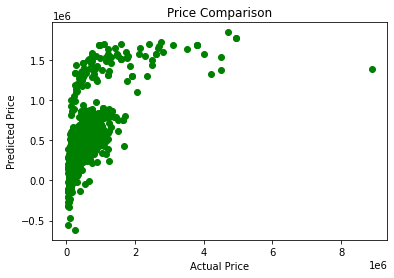

In [192]:
plt.scatter(y_test, y_pred, color="green")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Price Comparison")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

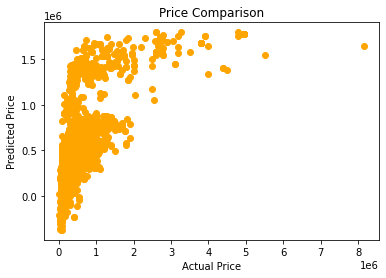

In [193]:
# Visualization on Training Data
train_pred = model.predict(X_train)
plt.scatter(y_train, train_pred, color="orange")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Price Comparison")
plt.show